# Análise de Sentimento

In [103]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [115]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de linguagem natural
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [116]:
dataframe_sentimento = pd.read_csv(r'C:\Users\Gilvancly\Documents\PROGRAMAÇÃO\PROJETOS\DATA TWITTER ELEITORAL\CONJUNTO DE DADOS\etapa03_dataframe_final_candidatos_pronto_para_sentimento.csv')

In [117]:
dataframe_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet_limpo
0,2022-08-01 22:42:31+00:00,1554236160322539524,@ptbrasil @LulaOficial Na urra eletrônica frau...,Lula,na urra eletrônica fraudada você quer dizer ...
1,2022-08-01 22:42:31+00:00,1554236158992961537,@LulaOficial @ricardostuckert Esse mente,Lula,esse mente
2,2022-08-01 22:42:29+00:00,1554236153099870208,"@AdamBravo79 @AnarcoFino ""Muito melhor"" : \nDe...",Lula,"""muito melhor"" : desistir da campanha apoiar..."
3,2022-08-01 22:42:29+00:00,1554236151858331648,"@extraclassejor No Rio Grande do Sul, Edgar Pr...",Lula,"no rio grande do sul, edgar pretto governador..."
4,2022-08-01 22:42:26+00:00,1554236139636129792,@LulaOficial @ricardostuckert https://t.co/vMx...,Lula,


In [120]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [121]:
dataframe_sentimento['Sentimentos'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i:analisador_de_texto.polarity_scores(''.join(re.findall(r'\w+', i.lower()))))

In [122]:
dataframe_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimentos
0,2022-08-01 22:42:31+00:00,1554236160322539524,@ptbrasil @LulaOficial Na urra eletrônica frau...,Lula,na urra eletrônica fraudada você quer dizer ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-08-01 22:42:31+00:00,1554236158992961537,@LulaOficial @ricardostuckert Esse mente,Lula,esse mente,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-08-01 22:42:29+00:00,1554236153099870208,"@AdamBravo79 @AnarcoFino ""Muito melhor"" : \nDe...",Lula,"""muito melhor"" : desistir da campanha apoiar...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-08-01 22:42:29+00:00,1554236151858331648,"@extraclassejor No Rio Grande do Sul, Edgar Pr...",Lula,"no rio grande do sul, edgar pretto governador...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-08-01 22:42:26+00:00,1554236139636129792,@LulaOficial @ricardostuckert https://t.co/vMx...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [123]:
dataframe_sentimento['Sentimentos']

0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
                             ...                        
598    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
599    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
600    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
601    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
602    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimentos, Length: 603, dtype: object

In [124]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['compound'])


In [125]:
dataframe_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao
0,2022-08-01 22:42:31+00:00,1554236160322539524,@ptbrasil @LulaOficial Na urra eletrônica frau...,Lula,na urra eletrônica fraudada você quer dizer ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1,2022-08-01 22:42:31+00:00,1554236158992961537,@LulaOficial @ricardostuckert Esse mente,Lula,esse mente,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,2022-08-01 22:42:29+00:00,1554236153099870208,"@AdamBravo79 @AnarcoFino ""Muito melhor"" : \nDe...",Lula,"""muito melhor"" : desistir da campanha apoiar...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,2022-08-01 22:42:29+00:00,1554236151858331648,"@extraclassejor No Rio Grande do Sul, Edgar Pr...",Lula,"no rio grande do sul, edgar pretto governador...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,2022-08-01 22:42:26+00:00,1554236139636129792,@LulaOficial @ricardostuckert https://t.co/vMx...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0


In [126]:
sentimento = []

In [127]:
for i in dataframe_sentimento['Composicao']:
    if i >= 0.05:
        sentimento.append('Positivo')
    elif i <= (-0.05):
        sentimento.append('Negativo')
    else:
        sentimento.append('Neutro')
        
sentimento

['Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',

In [128]:
dataframe_sentimento['Sentimento_final'] = sentimento

In [129]:
dataframe_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_final
0,2022-08-01 22:42:31+00:00,1554236160322539524,@ptbrasil @LulaOficial Na urra eletrônica frau...,Lula,na urra eletrônica fraudada você quer dizer ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
1,2022-08-01 22:42:31+00:00,1554236158992961537,@LulaOficial @ricardostuckert Esse mente,Lula,esse mente,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-08-01 22:42:29+00:00,1554236153099870208,"@AdamBravo79 @AnarcoFino ""Muito melhor"" : \nDe...",Lula,"""muito melhor"" : desistir da campanha apoiar...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-08-01 22:42:29+00:00,1554236151858331648,"@extraclassejor No Rio Grande do Sul, Edgar Pr...",Lula,"no rio grande do sul, edgar pretto governador...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-08-01 22:42:26+00:00,1554236139636129792,@LulaOficial @ricardostuckert https://t.co/vMx...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro


In [130]:
dataframe_sentimento['Sentimento_final'].value_counts()

Neutro    603
Name: Sentimento_final, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sentimento_final'>

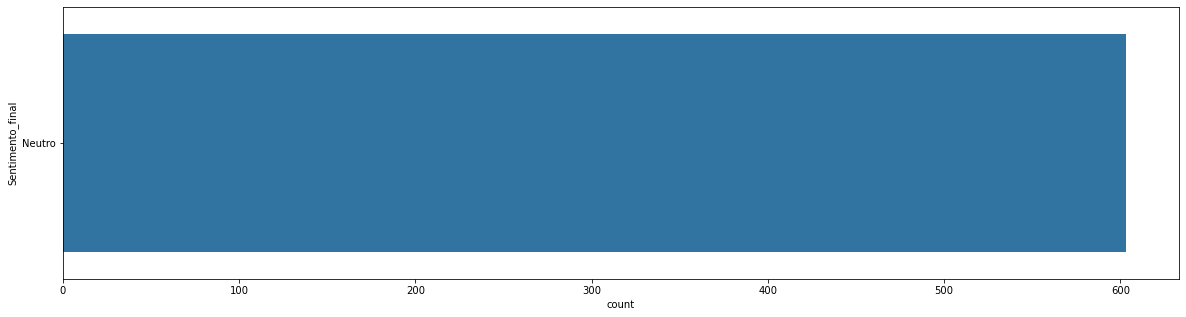

In [131]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_final', data=dataframe_sentimento)


# Lula

In [132]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato'] == 'Lula']
resultado_filtro_lula['Candidato'].unique()

array(['Lula'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Sentimento_final'>

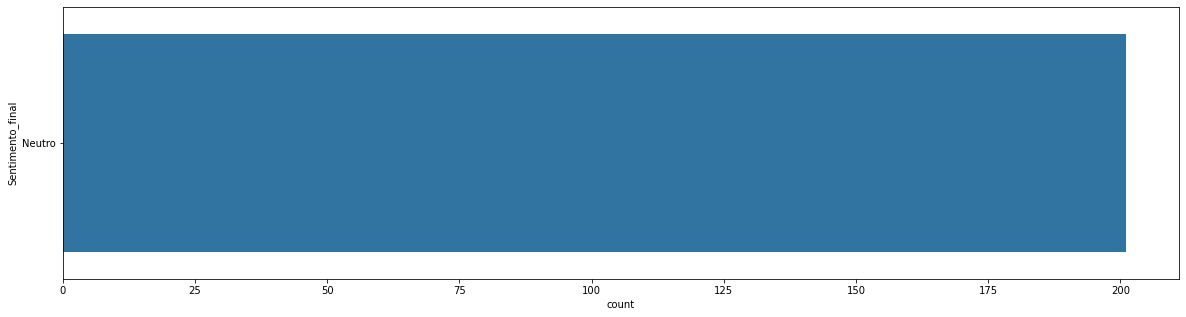

In [133]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_final', data=resultado_filtro_lula)

# Bolsonaro

In [134]:
resultado_filtro_bolsonaro = dataframe_sentimento[dataframe_sentimento['Candidato'] == 'Bolsonaro']
resultado_filtro_bolsonaro['Candidato'].unique()

array(['Bolsonaro'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Sentimento_final'>

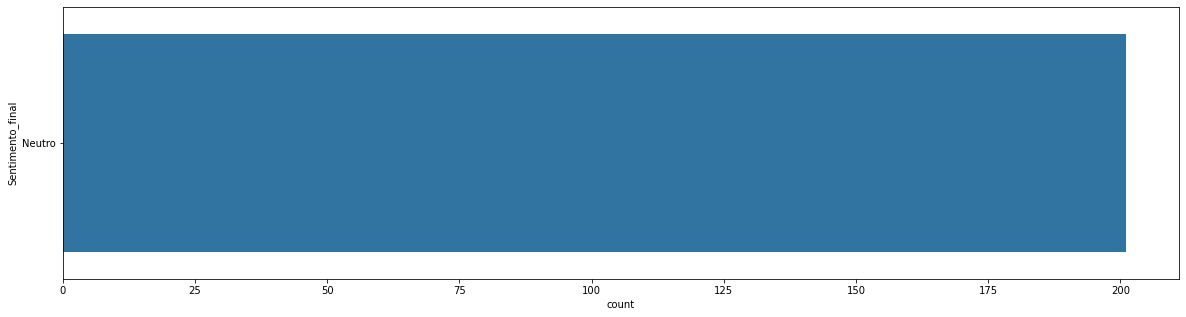

In [135]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_final', data=resultado_filtro_bolsonaro)

# Ciro Gomes

In [136]:
resultado_filtro_ciro = dataframe_sentimento[dataframe_sentimento['Candidato'] == 'Ciro Gomes']
resultado_filtro_ciro['Candidato'].unique()

array(['Ciro Gomes'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Sentimento_final'>

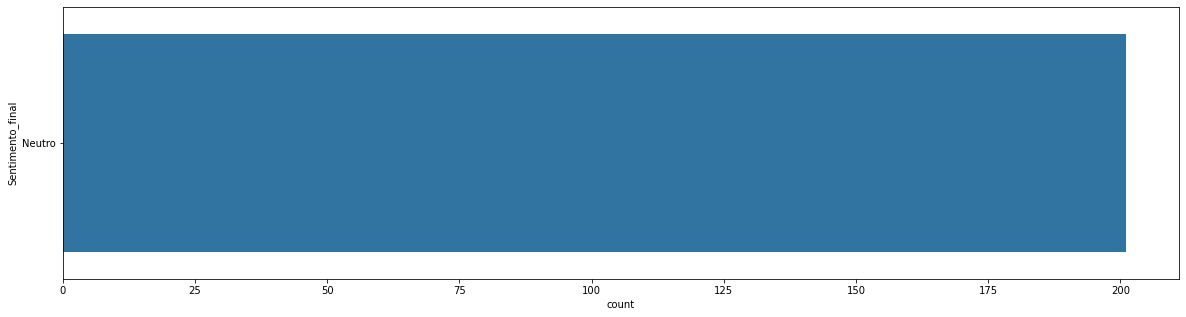

In [137]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_final', data=resultado_filtro_ciro)

In [146]:
data_frame_final = dataframe_sentimento[['Data_Hora', 'Id_Tweet', 'Tweet', 'Candidato', 'Tweet_limpo', 'Sentimento_final']]
data_frame_final.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimento_final
0,2022-08-01 22:42:31+00:00,1554236160322539524,@ptbrasil @LulaOficial Na urra eletrônica frau...,Lula,na urra eletrônica fraudada você quer dizer ...,Neutro
1,2022-08-01 22:42:31+00:00,1554236158992961537,@LulaOficial @ricardostuckert Esse mente,Lula,esse mente,Neutro
2,2022-08-01 22:42:29+00:00,1554236153099870208,"@AdamBravo79 @AnarcoFino ""Muito melhor"" : \nDe...",Lula,"""muito melhor"" : desistir da campanha apoiar...",Neutro
3,2022-08-01 22:42:29+00:00,1554236151858331648,"@extraclassejor No Rio Grande do Sul, Edgar Pr...",Lula,"no rio grande do sul, edgar pretto governador...",Neutro
4,2022-08-01 22:42:26+00:00,1554236139636129792,@LulaOficial @ricardostuckert https://t.co/vMx...,Lula,,Neutro


In [148]:
data_frame_final.to_csv('data_frame_final.csv', sep=',', index=False)